In [ ]:
!pip install kats

     |████████████████████████████████| 6.3 MB 4.6 MB/s 
     |████████████████████████████████| 866 kB 62.0 MB/s 
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 503 kB 63.0 MB/s 
     |████████████████████████████████| 3.3 MB 48.5 MB/s 
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 9.8 MB 41.6 MB/s 
     |████████████████████████████████| 26.3 MB 91 kB/s 
     |████████████████████████████████| 486 kB 70.0 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286607 sha256=7ceaa90105134524b136a2085a9f1d863c830c06ad5830a08908c0e0fe33de57
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=6637600 sha256=6d800645a7cf5bf8071cf4a092382941ef7d200902c165a3b0afee17ac838e7c
  Stored in directory: /root/.cache/pip/wheels/82/e8/a8/53f37f0a409bc51f8

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df_vermont = df[df['state'] == 'Vermont']

In [ ]:
df_vermont.head(10)

,date,state,fips,cases,deaths
379,2020-03-07,Vermont,50,1,0
414,2020-03-08,Vermont,50,1,0
451,2020-03-09,Vermont,50,1,0
490,2020-03-10,Vermont,50,1,0
534,2020-03-11,Vermont,50,2,0
581,2020-03-12,Vermont,50,2,0
632,2020-03-13,Vermont,50,2,0
683,2020-03-14,Vermont,50,5,0
736,2020-03-15,Vermont,50,8,0
789,2020-03-16,Vermont,50,12,0


In [ ]:
df_vermont.shape

(590, 5)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

import kats
import warnings
import kats.utils.time_series_parameter_tuning as tpt
from kats.consts import ModelEnum, SearchMethodEnum, TimeSeriesData
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel

from ax.core.parameter import ChoiceParameter, FixedParameter, ParameterType
from ax.models.random.sobol import SobolGenerator
from ax.models.random.uniform import UniformGenerator
warnings.simplefilter(action='ignore')
from kats.consts import TimeSeriesData


In [ ]:
data = [df_vermont["date"], df_vermont["deaths"]]
headers = ["date", "deaths"]
df1 = pd.concat(data, axis=1, keys=headers)

In [ ]:
df1 = df1[(df1['deaths'] > 0)]

In [ ]:
df1.isnull().sum()
# No null values

date      0
deaths    0
dtype: int64

In [ ]:
df1

,date,deaths
950,2020-03-19,2
1004,2020-03-20,2
1058,2020-03-21,2
1112,2020-03-22,2
1166,2020-03-23,2
...,...,...
32479,2021-10-13,340
32535,2021-10-14,342
32591,2021-10-15,343
32647,2021-10-16,345


In [ ]:
ts = TimeSeriesData(df1,time_col_name='date',value = 'deaths')
# creating the time series object

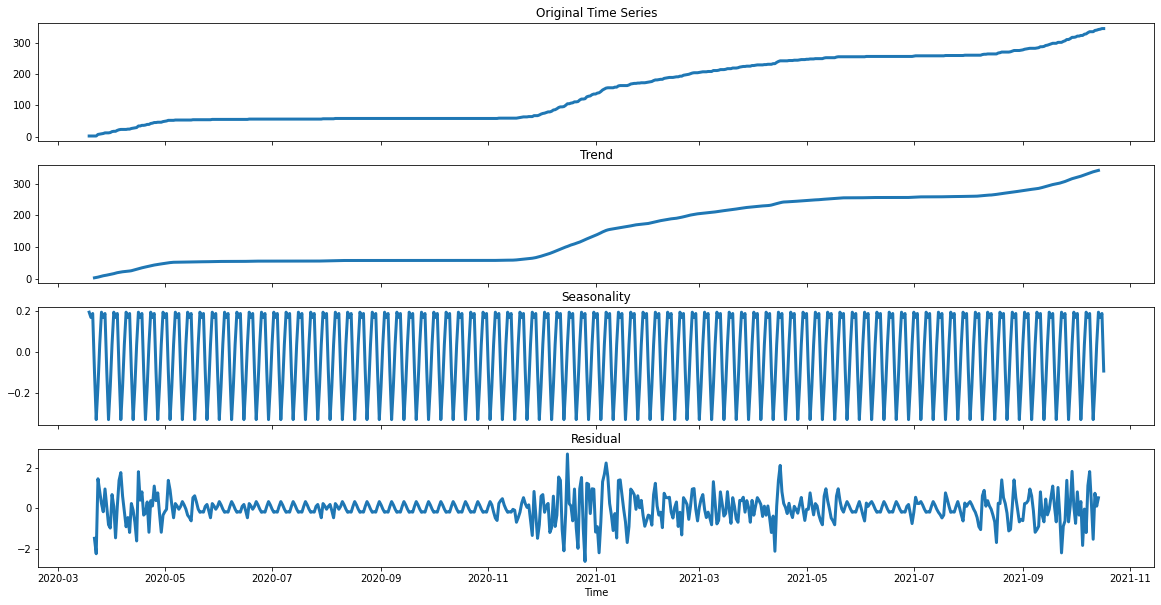

In [ ]:
# Decomposing the time series into components
from kats.utils.decomposition import TimeSeriesDecomposition

decomposer= TimeSeriesDecomposition(ts, decomposition= 'additive',method = 'seasonal_decompose')
results = decomposer.decomposer()
fig = decomposer.plot()


TimeSeriesChangePoint(start_time: 2021-01-05 00:00:00, end_time: 2021-01-05 00:00:00, confidence: 1.0)


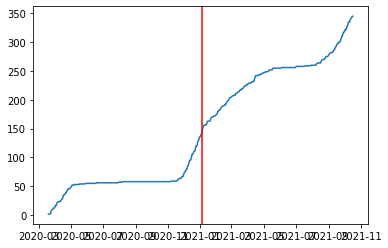

In [ ]:
from kats.detectors.cusum_detection import CUSUMDetector

cumsum_detector = CUSUMDetector(ts)
changepoints = cumsum_detector.detector()
print(changepoints[0][0])

# Plot
cumsum_detector.plot(changepoints)

#  5th January 2021


In [ ]:
from kats.detectors.outlier import OutlierDetector

outlier_detector = OutlierDetector(ts, "additive")

outlier_detector.detector()
outliers = outlier_detector.outliers
outliers[0]


[Timestamp('2020-03-22 00:00:00'),
 Timestamp('2020-03-23 00:00:00'),
 Timestamp('2020-04-15 00:00:00'),
 Timestamp('2020-04-16 00:00:00'),
 Timestamp('2020-11-29 00:00:00'),
 Timestamp('2020-12-11 00:00:00'),
 Timestamp('2020-12-12 00:00:00'),
 Timestamp('2020-12-14 00:00:00'),
 Timestamp('2020-12-16 00:00:00'),
 Timestamp('2020-12-22 00:00:00'),
 Timestamp('2020-12-24 00:00:00'),
 Timestamp('2020-12-26 00:00:00'),
 Timestamp('2021-01-03 00:00:00'),
 Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-07 00:00:00'),
 Timestamp('2021-01-08 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-01-13 00:00:00'),
 Timestamp('2021-01-14 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-04-13 00:00:00'),
 Timestamp('2021-04-15 00:00:00'),
 Timestamp('2021-04-16 00:00:00'),
 Timestamp('2021-08-17 00:00:00'),
 Timestamp('2021-08-20 00:00:00'),
 Timestamp('2021-08-27 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2021-09-

In [ ]:
split = int(0.8*len(df1))
train_ts = ts[0:split]
test_ts = ts[split:]

In [ ]:
parameters_grid_search_hw = [{'name': 'trend',
  'type': 'choice',
  'value_type': 'str',
  'values': ['additive', 'multiplicative']},
 {'name': 'damped',
  'type': 'choice',
  'value_type': 'bool',
  'values': [True, False]},
 {'name': 'seasonal',
  'type': 'choice',
  'value_type': 'str',
  'values': ['additive', 'multiplicative']},
 {'is_ordered': True,
  'name': 'seasonal_periods',
  'type': 'choice',
  'value_type': 'int',
  'values': [4, 7, 10, 14, 24, 30]}]


In [ ]:
def evaluation_function_hw(params):
    hw_params = HoltWintersParams(
        trend = params['trend'],
        damped = params['damped'],
        seasonal = params['seasonal'],
        seasonal_periods = params['seasonal_periods'])
    model = HoltWintersModel(train_ts, hw_params)
    model.fit()
    model_pred = model.predict(steps=len(test_ts))
    error = np.mean(np.abs(model_pred['fcst'].values - test_ts.value.values))
    return error


In [ ]:
parameter_tuner_grid = tpt.SearchMethodFactory.create_search_method(
    objective_name="evaluation_metric",
    parameters= parameters_grid_search_hw,
    selected_search_method=SearchMethodEnum.GRID_SEARCH)

[WARNING 10-18 19:49:33] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "trend". Defaulting to `False` for parameters of `ParameterType` STRING. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 10-18 19:49:33] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "damped". Defaulting to `True` for parameters of `ParameterType` BOOL. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 10-18 19:49:33] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "seasonal". Defaulting to `False` for parameters of `ParameterType` STRING. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 10-18 19:49:33] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "seasonal_periods". Defaulting to `True` for parameters 

In [ ]:
parameter_tuner_grid.generate_evaluate_new_parameter_values(
    evaluation_function=evaluation_function_hw)
parameter_tuning_results_grid = parameter_tuner_grid.list_parameter_value_scores()

[WARNING 10-18 19:49:33] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "trend". Defaulting to `False` for parameters of `ParameterType` STRING. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 10-18 19:49:33] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "damped". Defaulting to `True` for parameters of `ParameterType` BOOL. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 10-18 19:49:33] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "seasonal". Defaulting to `False` for parameters of `ParameterType` STRING. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.
[WARNING 10-18 19:49:33] ax.core.parameter: `sort_values` is not specified for `ChoiceParameter` "seasonal_periods". Defaulting to `True` for parameters 

In [ ]:
parameter_tuning_results_grid

,arm_name,metric_name,mean,sem,trial_index,parameters
0,0_0,evaluation_metric,23.491266,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
1,0_1,evaluation_metric,24.170955,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
2,0_2,evaluation_metric,22.795417,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
3,0_3,evaluation_metric,23.877646,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
4,0_4,evaluation_metric,24.015212,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
5,0_5,evaluation_metric,21.626669,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
6,0_6,evaluation_metric,22.966184,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
7,0_7,evaluation_metric,28.353285,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
8,0_8,evaluation_metric,24.791749,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."
9,0_9,evaluation_metric,26.706829,0.0,0,"{'trend': 'additive', 'damped': False, 'season..."


In [ ]:
min_index = parameter_tuning_results_grid['mean'].idxmin()
min_index

29

In [ ]:
values = parameter_tuning_results_grid.iloc[min_index].parameters
values

          time        fcst
578 2021-10-18  346.665535
579 2021-10-19  348.358887
580 2021-10-20  349.843760
581 2021-10-21  351.173009
582 2021-10-22  352.610992
583 2021-10-23  354.473750
584 2021-10-24  356.127634
585 2021-10-25  357.573418
586 2021-10-26  359.391196
587 2021-10-27  361.000373
588 2021-10-28  362.559208
589 2021-10-29  364.279444
590 2021-10-30  365.791065
591 2021-10-31  367.411947
592 2021-11-01  369.246670
593 2021-11-02  370.714758
594 2021-11-03  372.501918
595 2021-11-04  373.974937
596 2021-11-05  375.503395
597 2021-11-06  377.034954
598 2021-11-07  378.990552
599 2021-11-08  380.790064
600 2021-11-09  382.119561
601 2021-11-10  384.023899
602 2021-11-11  385.831359
603 2021-11-12  387.340014
604 2021-11-13  388.851377
605 2021-11-14  390.615943
606 2021-11-15  392.433245
607 2021-11-16  394.102756
None


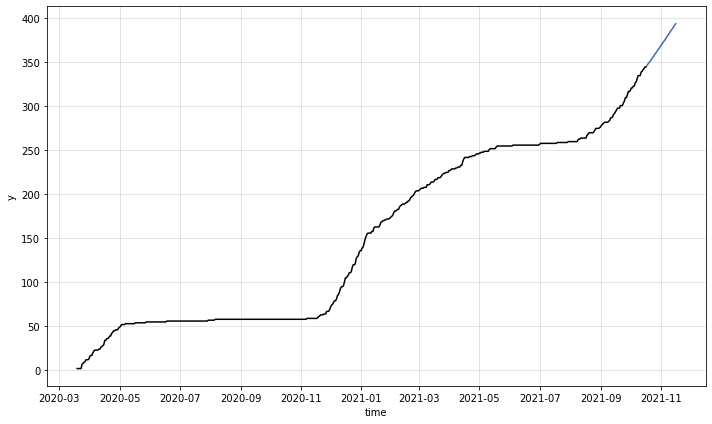

In [ ]:
params = HoltWintersParams(trend = 'multiplicative',seasonal = 'additive',
  damped = False ,seasonal_periods = 30)
hw = HoltWintersModel(ts,params)
hw_fit = hw.fit()
prediction = hw.predict(30)
plot = hw.plot()
print(prediction)
print(plot)


In [ ]:
from kats.utils.backtesters import BackTesterSimple

In [ ]:
params = HoltWintersParams(damped = True, seasonal = 'multiplicative',seasonal_periods = 30 ,trend = 'additive')
ALL_ERRORS = ['mape', 'smape', 'mae', 'mase', 'mse', 'rmse']

backtester_hw = BackTesterSimple(
    error_methods=ALL_ERRORS,
    data=ts,
    params=params,
    train_percentage=80,
    test_percentage=20, 
    model_class=HoltWintersModel)

backtester_hw.run_backtest()


In [ ]:
backtester_errors = {}

In [ ]:
backtester_errors['HoltWinters'] = {}
for error, value in backtester_hw.errors.items():
    backtester_errors['HoltWinters'][error] = value


In [ ]:
pd.DataFrame.from_dict(backtester_errors)

,HoltWinters
mae,23.054572
mape,0.075054
mase,41.843140
mse,1198.711536
rmse,34.622414
smape,0.081546
